In [34]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('./bug-hunter/class.csv')
df.head()

,Project,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,AD,CD,CLOC,DLOC,PDA,PUA,TCD,TCLOC,DIT,NOA,NOC,NOD,NOP,LLOC,LOC,NA,NG,NLA,NLG,NLM,NLPA,NLPM,NLS,NM,NOS,NPA,NPM,NS,TLLOC,TLOC,TNA,TNG,TNLA,TNLG,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,WarningBlocker,WarningCritical,WarningInfo,WarningMajor,WarningMinor,Android Rules,Basic Rules,Brace Rules,Clone Implementation Rules,Code Size Rules,Comment Rules,Controversial Rules,Coupling Rules,Design Rules,Empty Code Rules,Finalizer Rules,Import Statement Rules,J2EE Rules,JUnit Rules,Jakarta Commons Logging Rules,Java Logging Rules,JavaBean Rules,MigratingToJUnit4 Rules,Migration Rules,Migration13 Rules,Migration14 Rules,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,antlr4,b4a53d56d4324739e823344237c4d7fdf6cac90c,org.antlr.v4.semantics.SymbolCollector,0.000000,0,0,0,0.000000,0.000000,0,0,2,1,1,24,11,2,1,4,24,0.050000,0.095238,12,11,1,19,0.095238,12,0,0,0,0,0,114,143,9,0,9,0,20,8,19,1,20,38,8,19,1,114,143,9,0,9,0,20,8,19,1,20,38,8,19,1,0,0,0,0,31,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,1
1,antlr4,dc2c9b039e1497ad924c852e07f3a8f981ed078b,org.antlr.v4.test.tool.TestActionTranslation,0.032441,2,2,2,0.047297,0.055851,21,21,81,0,0,95,2,0,0,1,96,0.031250,0.062344,25,10,3,93,0.062344,25,1,1,0,0,1,376,444,1,1,1,0,95,0,95,0,97,135,0,97,0,376,444,1,1,1,0,95,0,95,0,97,135,0,97,0,0,0,0,253,24,0,0,0,0,0,0,1,0,21,0,0,0,0,94,0,0,0,0,0,0,0,0,2,0,0,0,8,95,56,0,1
2,antlr4,6de95c15e73d7bb092b1519405cd0f1859e63e8b,org.antlr.v4.test.TestSemPredEvalParser,0.761986,23,55,55,0.695187,0.791111,390,356,1,0,0,23,1,0,0,1,24,0.416667,0.131274,68,43,10,14,0.131274,68,1,1,0,0,1,450,561,8,7,0,0,23,0,23,0,76,104,6,47,1,450,561,8,7,0,0,23,0,23,0,76,104,6,47,1,0,0,0,33,39,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,10,22,1,0,0
3,antlr4,6de95c15e73d7bb092b1519405cd0f1859e63e8b,org.antlr.v4.runtime.atn.ParserATNSimulator,0.040439,1,6,2,0.031144,0.043133,46,38,2,6,6,239,42,9,14,88,129,0.250000,0.438138,687,457,3,9,0.438138,687,1,1,1,1,1,881,1477,16,15,11,13,41,5,11,1,53,508,9,23,1,881,1477,16,15,11,13,41,5,11,1,53,508,9,23,1,0,0,0,1,227,0,2,56,0,0,0,3,0,113,0,0,0,0,0,0,38,0,0,0,0,0,0,15,0,1,0,0,0,0,0,0
4,antlr4,a6e7a72ac767d73e6f760750b53b13e2e89d7261,org.antlr.v4.runtime.Recognizer,0.000000,0,0,0,0.000000,0.000000,0,0,4,3,3,39,13,42,86,10,38,0.517241,0.378505,81,79,15,14,0.376744,81,0,0,2,6,0,133,255,6,18,6,18,28,1,28,4,28,61,1,28,4,134,256,6,18,6,18,28,1,28,4,28,61,1,28,4,0,2,0,2,17,0,0,4,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,0,0,1


In [ ]:
df.info() 
# Hash is the commit id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84562 entries, 0 to 84561
Data columns (total 99 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Project                            84562 non-null  object 
 1   Hash                               84562 non-null  object 
 2   LongName                           84562 non-null  object 
 3   CC                                 84562 non-null  float64
 4   CCL                                84562 non-null  int64  
 5   CCO                                84562 non-null  int64  
 6   CI                                 84562 non-null  int64  
 7   CLC                                84562 non-null  float64
 8   CLLC                               84562 non-null  float64
 9   LDC                                84562 non-null  int64  
 10  LLDC                               84562 non-null  int64  
 11  LCOM5                              84562 non-null  int

The description of these columns according to the dataset source:
Abbreviation = Full name
* CC = Clone Coverage
* CCL = Clone Classes
* CCO = Clone Complexity
* CI = Clone Instances
* CLC = Clone Line Coverage
* CLLC = Clone Lines of Code
* LDC = Lines of Duplicated Code
* LLDC = Logical Lines of Duplicated Code
* CLOC = Comment Lines of Code
* LOC = Lines of Code
* LLOC = Logical Lines of Code
* NL = Nesting Level
* NLE = Nesting Level Else-If
* NII = Number of Incoming Invocations
* NOI = Number of Outgoing Invocations
* CD = Comment Density
* DLOC = Documentation Lines of Code
* TCD = Total Comment Density
* TCLOC = Total Comment Lines of Code
* NOS = Number of Statements
* TLOC = Total Lines of Code
* TLLOC = Total Logical Lines of Code
* TNOS = Total Number of Statements 
* McCC = McCabe’s Cyclomatic Complexity 
* PDA = Public Documented API 
* PUA = Public Undocumented API 
* HCPL = Halstead Calculated Program Length 
* HDIF = Halstead Difficulty
* HEFF = Halstead Effort 
* HNDB = Halstead Number of Delivered Bugs 
* HPL = Halstead Program Length
* HPV = Halstead Program Vocabulary 
* HTRP = Halstead Time Required to Program
* HVOL = Halstead Volume 
* MIMS = Maintainability Index (Microsoft version)
* MI = Maintainability Index (Original version)
* MISEI = Maintainability Index (SEI version) 
* MISM = Maintainability Index (SourceMeter version)  
* NUMPAR = Number of Parameters 
* LCOM5 = Lack of Cohesion in Methods 5 
* WMC = Weighted Methods per Class 
* CBO = Coupling Between Object classes 
* CBOI = Coupling Between Object classes Inverse 
* RFC = Response set For Class
* AD = API Documentation 
* DIT = Depth of Inheritance Tree 
* NOA = Number of Ancestors 
* NOC = Number of Children  
* NOD = Number of Descendants 
* NOP = Number of Parents
* NA = Number of Attributes
* NG = Number of Getters 
* NLA = Number of Local Attributes
* NLG = Number of Local Getters
* NLM = Number of Local Methods 
* NLPA = Number of Local Public Attributes
* NLPM = Number of Local Public Methods 
* NLS = Number of Local Setters
* NM = Number of Methods 
* NPA = Number of Public Attributes 
* NPM = Number of Public Methods 
* NS = Number of Setters 
* TNA = Total Number of Attributes 
* TNG = Total Number of Getters 
* TNLA = Total Number of Local Attributes 
* TNLG = Total Number of Local Getters 
* TNLM = Total Number of Local Methods 
* TNLPA = Total Number of Local Public Attributes  
* TNLPM = Total Number of Local Public Methods
* TNLS = Total Number of Local Setters 
* TNM = Total Number of Methods  
* TNPA = Total Number of Public Attributes  
* TNPM = Total Number of Public Methods
* TNS = Total Number of Setters 

In [5]:
def getColumnDescriptions():
    column_desc = [
        'Name of the project',
        'Hashcode of the class',
        'Full name of the class',
        'Clone Coverage',
        'Clone Classes',
        'Clone Complexity',
        'Clone Instances',
        'Clone Line Coverage',
        'Clone Lines of Code',
        'Lines of Duplicated Code',
        'Logical Lines of Duplicated Code',
        'Lack of Cohesion in Methods 5',
        'Nesting Level',
        'Nesting Level Else-If',
        'Weighted Methods per Class',
        'Coupling Between Object classes',
        'Coupling Between Object classes Inverse',
        'Number of Incoming Invocations',
        'Number of Outgoing Invocations',
        'Response set For Class',
        'API Documentation',
        'Comment Density',
        'Comment Lines of Code',
        'Documentation Lines of Code',
        'Public Documented API',
        'Public Undocumented API',
        'Total Comment Density',
        'Total Comment Lines of Code',
        'Depth of Inheritance Tree',
        'Number of Ancestors',
        'Number of Children',
        'Number of Descendants',
        'Number of Parents',
        'Logical Lines of Code',
        'Lines of Code',
        'Number of Attributes',
        'Number of Getters',
        'Number of Local Attributes',
        'Number of Local Getters',
        'Number of Local Methods',
        'Number of Local Public Attributes',
        'Number of Local Public Methods',
		'Number of Local Setters',
        'Number of Methods',
        'Number of Statements',
        'Number of Public Attributes',
        'Number of Public Methods',
        'Number of Setters',
		'Total Logical Lines of Code',
		'Total Lines of Code',
        'Total Number of Attributes',
        'Total Number of Getters',
        'Total Number of Local Attributes',
        'Total Number of Local Getters',
        'Total Number of Local Methods',
        'Total Number of Local Public Attributes',
        'Total Number of Local Public Methods',
        'Total Number of Local Setters',
        'Total Number of Methods',
        'Total Number of Statements',
        'Total Number of Public Attributes',
        'Total Number of Public Methods',
        'Total Number of Setters',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef',
        'abcdef'
    ]
    
    return column_desc

In [6]:
def isUseful():
    np.nan

In [7]:
column_info_df = pd.DataFrame()
column_info_df['column'] = df.columns
column_info_df['description'] = getColumnDescriptions()
column_info_df['useful'] = isUseful()

column_info_df

,column,description,useful
0,Project,Name of the project,None
1,Hash,Hashcode of the class,None
2,LongName,Full name of the class,None
3,CC,Clone Coverage,None
4,CCL,Clone Classes,None
5,CCO,Clone Complexity,None
6,CI,Clone Instances,None
7,CLC,Clone Line Coverage,None
8,CLLC,Clone Lines of Code,None
9,LDC,Lines of Duplicated Code,None


In [8]:
print(df.isnull().sum()) 

Project                              0
Hash                                 0
LongName                             0
CC                                   0
CCL                                  0
CCO                                  0
CI                                   0
CLC                                  0
CLLC                                 0
LDC                                  0
LLDC                                 0
LCOM5                                0
NL                                   0
NLE                                  0
WMC                                  0
CBO                                  0
CBOI                                 0
NII                                  0
NOI                                  0
RFC                                  0
AD                                   0
CD                                   0
CLOC                                 0
DLOC                                 0
PDA                                  0
PUA                      

In [9]:
df.corr(numeric_only=True)

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,AD,CD,CLOC,DLOC,PDA,PUA,TCD,TCLOC,DIT,NOA,NOC,NOD,NOP,LLOC,LOC,NA,NG,NLA,NLG,NLM,NLPA,NLPM,NLS,NM,NOS,NPA,NPM,NS,TLLOC,TLOC,TNA,TNG,TNLA,TNLG,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,WarningBlocker,WarningCritical,WarningInfo,WarningMajor,WarningMinor,Android Rules,Basic Rules,Brace Rules,Clone Implementation Rules,Code Size Rules,Comment Rules,Controversial Rules,Coupling Rules,Design Rules,Empty Code Rules,Finalizer Rules,Import Statement Rules,J2EE Rules,JUnit Rules,Jakarta Commons Logging Rules,Java Logging Rules,JavaBean Rules,MigratingToJUnit4 Rules,Migration Rules,Migration13 Rules,Migration14 Rules,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
CC,1.000000,0.253370,0.065532,0.176866,0.985021,0.991108,0.260091,0.252458,-0.033795,-0.042475,-0.073026,0.002958,-0.008454,-0.061822,-0.052486,0.007287,-0.002950,-0.098729,-0.128373,-0.048120,-0.060657,-0.054331,0.010257,-0.131321,-0.056627,-0.028393,-0.055876,-0.027270,-0.028344,-0.027413,0.102739,0.093775,-0.025403,-0.024413,-0.080921,-0.066285,-0.017653,-0.003778,-0.009385,-0.027638,0.081067,0.123627,0.031868,0.082865,-0.008588,0.088070,0.078291,-0.039030,-0.024562,-0.088877,-0.068927,-0.013928,-0.017948,0.000455,-0.028574,0.038519,0.111626,0.017638,0.045941,-0.015416,-0.001890,0.013504,NaN,0.103711,0.101386,NaN,0.023309,0.020332,-0.005618,NaN,NaN,-0.050627,NaN,0.111226,0.025503,-0.013526,0.090850,-0.010027,0.100254,-0.028381,-0.025253,0.010639,NaN,0.017198,NaN,NaN,NaN,0.022134,0.006145,-0.030285,-0.008179,0.111591,0.129657,0.052236,-0.001890,-0.021432
CCL,0.253370,1.000000,0.340690,0.957750,0.262358,0.259736,0.932128,0.925394,0.001998,0.059944,0.071500,0.158449,0.098336,0.003266,-0.003464,0.094506,0.120900,-0.032419,-0.047603,0.042203,0.005928,0.012751,0.100905,-0.049120,0.037954,-0.027404,-0.025895,-0.006587,-0.007234,-0.016598,0.580255,0.548279,0.082066,0.031104,0.026477,0.027136,0.129981,0.022142,0.093951,0.021027,0.102742,0.652090,0.106348,0.079113,0.018960,0.554391,0.520870,0.075749,0.027678,0.028156,0.028587,0.150655,0.022046,0.134097,0.023812,0.083442,0.631270,0.096811,0.080209,0.019464,-0.000515,0.086269,NaN,0.250465,0.613489,NaN,0.120321,0.160144,0.000998,NaN,NaN,0.011017,NaN,0.842521,0.123140,-0.003312,0.403026,-0.000022,0.089651,0.000496,0.009804,0.011580,NaN,0.006868,NaN,NaN,NaN,0.124513,0.053276,0.004124,0.109560,0.111963,0.106121,0.341649,-0.000515,0.007040
CCO,0.065532,0.340690,1.000000,0.501877,0.069573,0.068968,0.349003,0.362793,-0.000648,0.085073,0.077503,0.306404,0.034364,0.010596,0.002089,0.028236,0.074580,0.012548,-0.013756,0.018851,0.004492,0.017283,0.042960,-0.013913,0.016990,-0.008792,-0.007297,-0.001746,-0.001922,0.001229,0.283261,0.256101,0.170913,0.018409,0.032245,0.028843,0.125564,0.018207,0.043890,0.012481,0.061964,0.301654,0.248251,0.020002,0.005307,0.261963,0.236221,0.138649,0.012406,0.026002,0.026950,0.109353,0.015141,0.046253,0.012454,0.039518,0.287866,0.216880,0.018292,0.005294,-0.000132,0.045985,NaN,0.169761,0.379778,NaN,0.200088,0.447883,0.000314,NaN,NaN,0.016325,NaN,0.229759,0.192786,-0.000791,0.080188,0.000149,0.009819,-0.000924,0.004727,0.001265,NaN,0.000735,NaN,NaN,NaN,0.211005,0.029387,0.002383,0.147752,0.017660,0.012931,0.069757,-0.000132,0.000988
CI,0.176866,0.957750,0.501877,1.000000,0.188589,0.184301,0.891933,0.891121,-0.006532,0.040978,0.048626,0.154564,0.053261,0.006773,-0.003784,0.036672,0.062227,-0.021296,-0.035035,0.020363,-0.003588,0.002472,0.047119,-0.035913,0.017308,-0.034050,-0.031170,-0.004045,-0.004371,-0.029289,0.529835,0.493358,0.076404,0.005409,0.013440,0.009469,0.084971,0.020714,0.042832,0.002308,0.051075,0.602956,0.123134,0.027123,-0.000172,0.503141,0.465706,0.060966,0.005818,0.009768,0.008686,0.109686,0.016163,0.090067,0.002853,0.046104,0.581075,0.107053,0.040769,0.

In [10]:
print(df.corr(numeric_only=True).abs().nlargest(10, 'Number of Bugs').index)
print(df.corr(numeric_only=True).abs().nlargest(10, 'Number of Bugs')['Number of Bugs'])

Index(['Number of Bugs', 'NOI', 'RFC', 'CBO', 'TNLM', 'NLM', 'NLPM', 'TLOC',
       'TNLPM', 'NLE'],
      dtype='object')
Number of Bugs    1.000000
NOI               0.165213
RFC               0.163599
CBO               0.160228
TNLM              0.119764
NLM               0.119534
NLPM              0.116183
TLOC              0.115834
TNLPM             0.115132
NLE               0.112494
Name: Number of Bugs, dtype: float64


# Clean Data

In [11]:
df = pd.read_csv('./bug-hunter/class.csv')
df.head(10)

,Project,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,AD,CD,CLOC,DLOC,PDA,PUA,TCD,TCLOC,DIT,NOA,NOC,NOD,NOP,LLOC,LOC,NA,NG,NLA,NLG,NLM,NLPA,NLPM,NLS,NM,NOS,NPA,NPM,NS,TLLOC,TLOC,TNA,TNG,TNLA,TNLG,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,WarningBlocker,WarningCritical,WarningInfo,WarningMajor,WarningMinor,Android Rules,Basic Rules,Brace Rules,Clone Implementation Rules,Code Size Rules,Comment Rules,Controversial Rules,Coupling Rules,Design Rules,Empty Code Rules,Finalizer Rules,Import Statement Rules,J2EE Rules,JUnit Rules,Jakarta Commons Logging Rules,Java Logging Rules,JavaBean Rules,MigratingToJUnit4 Rules,Migration Rules,Migration13 Rules,Migration14 Rules,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,antlr4,b4a53d56d4324739e823344237c4d7fdf6cac90c,org.antlr.v4.semantics.SymbolCollector,0.000000,0,0,0,0.000000,0.000000,0,0,2,1,1,24,11,2,1,4,24,0.050000,0.095238,12,11,1,19,0.095238,12,0,0,0,0,0,114,143,9,0,9,0,20,8,19,1,20,38,8,19,1,114,143,9,0,9,0,20,8,19,1,20,38,8,19,1,0,0,0,0,31,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,1
1,antlr4,dc2c9b039e1497ad924c852e07f3a8f981ed078b,org.antlr.v4.test.tool.TestActionTranslation,0.032441,2,2,2,0.047297,0.055851,21,21,81,0,0,95,2,0,0,1,96,0.031250,0.062344,25,10,3,93,0.062344,25,1,1,0,0,1,376,444,1,1,1,0,95,0,95,0,97,135,0,97,0,376,444,1,1,1,0,95,0,95,0,97,135,0,97,0,0,0,0,253,24,0,0,0,0,0,0,1,0,21,0,0,0,0,94,0,0,0,0,0,0,0,0,2,0,0,0,8,95,56,0,1
2,antlr4,6de95c15e73d7bb092b1519405cd0f1859e63e8b,org.antlr.v4.test.TestSemPredEvalParser,0.761986,23,55,55,0.695187,0.791111,390,356,1,0,0,23,1,0,0,1,24,0.416667,0.131274,68,43,10,14,0.131274,68,1,1,0,0,1,450,561,8,7,0,0,23,0,23,0,76,104,6,47,1,450,561,8,7,0,0,23,0,23,0,76,104,6,47,1,0,0,0,33,39,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,10,22,1,0,0
3,antlr4,6de95c15e73d7bb092b1519405cd0f1859e63e8b,org.antlr.v4.runtime.atn.ParserATNSimulator,0.040439,1,6,2,0.031144,0.043133,46,38,2,6,6,239,42,9,14,88,129,0.250000,0.438138,687,457,3,9,0.438138,687,1,1,1,1,1,881,1477,16,15,11,13,41,5,11,1,53,508,9,23,1,881,1477,16,15,11,13,41,5,11,1,53,508,9,23,1,0,0,0,1,227,0,2,56,0,0,0,3,0,113,0,0,0,0,0,0,38,0,0,0,0,0,0,15,0,1,0,0,0,0,0,0
4,antlr4,a6e7a72ac767d73e6f760750b53b13e2e89d7261,org.antlr.v4.runtime.Recognizer,0.000000,0,0,0,0.000000,0.000000,0,0,4,3,3,39,13,42,86,10,38,0.517241,0.378505,81,79,15,14,0.376744,81,0,0,2,6,0,133,255,6,18,6,18,28,1,28,4,28,61,1,28,4,134,256,6,18,6,18,28,1,28,4,28,61,1,28,4,0,2,0,2,17,0,0,4,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,0,0,1
5,antlr4,661c87b47ceca09488c047acb638362670e3ded0,org.antlr.v4.test.runtime.BaseRuntimeTest,0.252708,1,6,2,0.176471,0.164502,48,38,1,3,3,34,11,193,386,29,39,0.363636,0.073276,17,12,4,7,0.072289,18,0,0,180,180,0,215,255,6,1,6,1,10,4,10,1,10,123,4,10,1,231,272,6,1,6,1,11,4,10,1,11,124,4,10,1,0,0,0,11,17,0,0,0,0,0,0,0,0,6,0,0,0,0,8,0,3,0,0,0,0,0,0,3,0,0,2,2,3,1,0,1
6,antlr4,8f2eca5ae1e35930a8c84891ed429f8ef00a7ed7,org.antlr.v4.runtime.Parser,0.034433,1,4,2,0.024565,0.038241,24,20,3,4,4,131,38,33,53,69,128,0.578947,0.421115,355,330,33,24,0.404328,355,1,1,2,2,1,488,935,15,39,9,23,59,0,56,9,83,281,1,80,11,523,977,16,39,10,23,67,1,64,9,91,286,2,88,11,0,2,0,0,87,0,2,20,0,0,0,0,0,49,0,0,0,0,0,0,6,0,0,0,0,0,0,11,0,0,1,0,0,0,0,1
7,antlr4,91752af88de29d5fe48fdb073b889095d1ed3c2d,org.antlr.v4.tool.Alternative,0.000000,0,0,0,0.000000,0.000000,0,0,1,3,2,33,9,17,2,6,15,0.400000,0.256637,29,22,4,6,0.256637,29,1,1,0,0,1,84,125,9,1,9,1,9,9,9,0,9,50,9,9,0,84,125,9,1,9,1,9,9,9,0,9,50,9,9,0,0,0,0,0,41,0,0,18,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,antlr4,39ddd0da3a503fe96e94f1a01558384b14c7a36e,org.antlr.v4.tool.Grammar,0.000000,0,0,0,0.000000,0.000000,0,0,10,4,4,219,45,93,350,35,117,0.506173,0.288338,314,268,41,40,0.284163,314,1,1,1,1,1,77

In [12]:
df.shape

(84562, 99)

In [13]:
print(df.corr(numeric_only=True).abs().nsmallest(10, 'Number of Bugs')['Number of Bugs'])

CCO                                  0.000988
CI                                   0.001018
J2EE Rules                           0.001707
WarningBlocker                       0.002612
Vulnerability Rules                  0.002612
Unnecessary and Unused Code Rules    0.003247
JavaBean Rules                       0.004639
CCL                                  0.007040
NLPA                                 0.007595
Security Code Guideline Rules        0.009075
Name: Number of Bugs, dtype: float64


In [14]:
df.isnull().sum()

Project                              0
Hash                                 0
LongName                             0
CC                                   0
CCL                                  0
CCO                                  0
CI                                   0
CLC                                  0
CLLC                                 0
LDC                                  0
LLDC                                 0
LCOM5                                0
NL                                   0
NLE                                  0
WMC                                  0
CBO                                  0
CBOI                                 0
NII                                  0
NOI                                  0
RFC                                  0
AD                                   0
CD                                   0
CLOC                                 0
DLOC                                 0
PDA                                  0
PUA                      

In [15]:
print(df.corr(numeric_only=True).abs().nlargest(10, 'Number of Bugs')['Number of Bugs'])

Number of Bugs    1.000000
NOI               0.165213
RFC               0.163599
CBO               0.160228
TNLM              0.119764
NLM               0.119534
NLPM              0.116183
TLOC              0.115834
TNLPM             0.115132
NLE               0.112494
Name: Number of Bugs, dtype: float64


In [16]:
columnsToMaintain = ['Number of Bugs', 'NOI', 'RFC', 'CBO', 'TNLM', 'NLM', 'NLPM', 'TLOC', 'TNLPM', 'NLE']
# [i for i in fruits if i not in lst]
df2 = df.drop(columns=[i for i in df.columns if i not in columnsToMaintain])
df2.head()

,NLE,CBO,NOI,RFC,NLM,NLPM,TLOC,TNLM,TNLPM,Number of Bugs
0,1,11,4,24,20,19,143,20,19,1
1,0,2,1,96,95,95,444,95,95,1
2,0,1,1,24,23,23,561,23,23,0
3,6,42,88,129,41,11,1477,41,11,0
4,3,13,10,38,28,28,256,28,28,1


<Axes: >

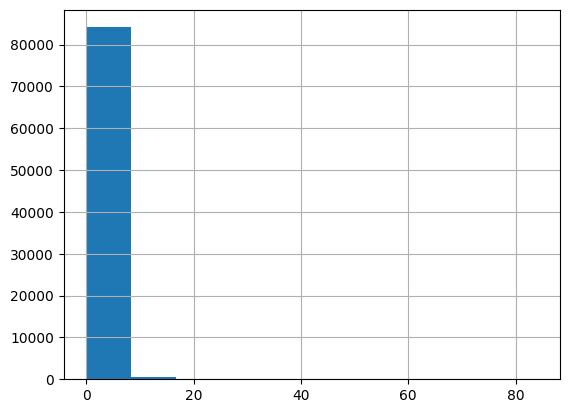

In [17]:
df2['NLE'].hist() # Nested If then else

<Axes: >

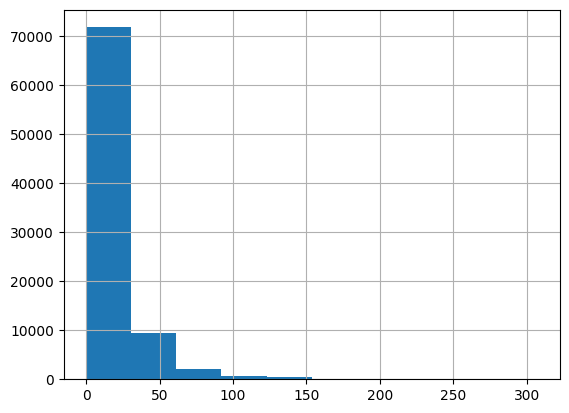

In [18]:
df2['CBO'].hist() # Coupling Between Object classes

<Axes: >

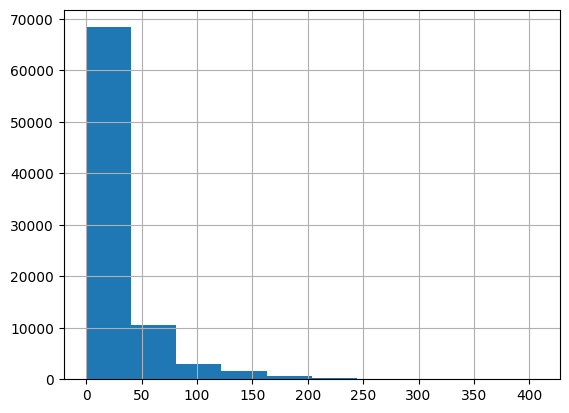

In [19]:
df2['NOI'].hist() # Number of Outgoing Invocations

<Axes: >

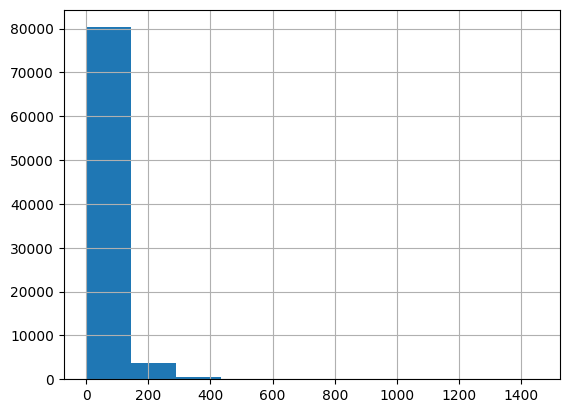

In [20]:
df2['RFC'].hist() # Response set For Class

<Axes: >

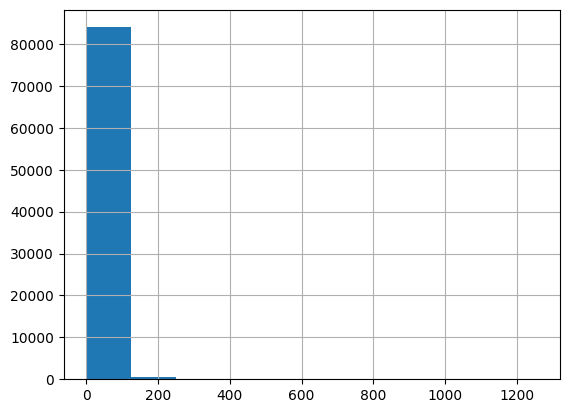

In [21]:
df2['NLM'].hist() # Number of Local Methods

<Axes: >

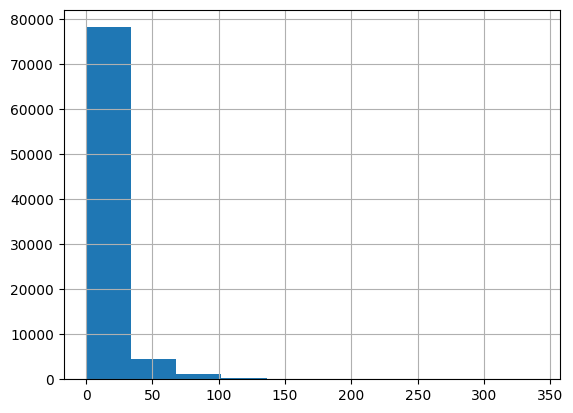

In [22]:
df2['NLPM'].hist() # Number of Local Public Methods

<Axes: >

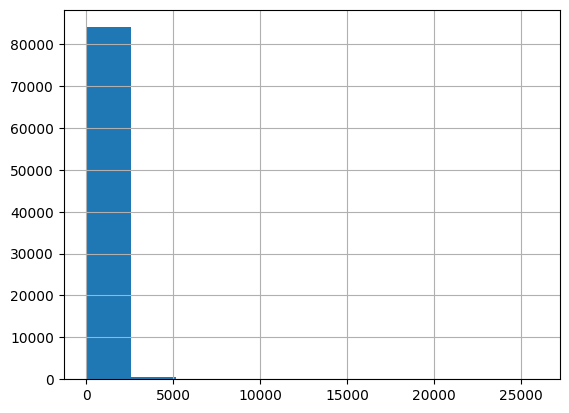

In [23]:
df2['TLOC'].hist() # Total Lines of Code

<Axes: >

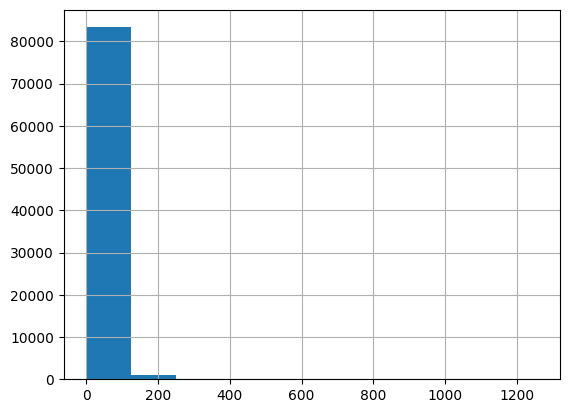

In [24]:
df2['TNLM'].hist() # Total Number of Local Methods

AttributeError: Line2D.set() got an unexpected keyword argument 'type'

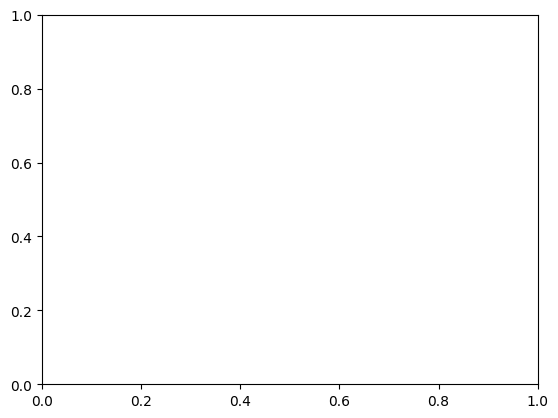

In [ ]:
df2['TNLPM'].hist() # Total Number of Local Public Methods

In [26]:
df2.rename(columns={
    'TNLPM': 'LocalPublicMethods', 
    'TNLM': 'LocalMethods', 
    'TLOC': 'LinesOfCode', 
    'NLPM': 'PublicMethods', 
    'NLM': 'LocalMethods2', 
    'RFC': 'ResponseSetForClass', 
    'NOI': 'OutgoingInvocations', 
    'CBO': 'CouplingWithClasses', 
    'NLE': 'NestedLevelIf'}, inplace=True)
df2.head()

,NestedLevelIf,CouplingWithClasses,OutgoingInvocations,ResponseSetForClass,LocalMethods2,PublicMethods,LinesOfCode,LocalMethods,LocalPublicMethods,Number of Bugs
0,1,11,4,24,20,19,143,20,19,1
1,0,2,1,96,95,95,444,95,95,1
2,0,1,1,24,23,23,561,23,23,0
3,6,42,88,129,41,11,1477,41,11,0
4,3,13,10,38,28,28,256,28,28,1


In [27]:
df2.drop(columns=['PublicMethods', 'LocalMethods2'], inplace=True)
df2.head()

,NestedLevelIf,CouplingWithClasses,OutgoingInvocations,ResponseSetForClass,LinesOfCode,LocalMethods,LocalPublicMethods,Number of Bugs
0,1,11,4,24,143,20,19,1
1,0,2,1,96,444,95,95,1
2,0,1,1,24,561,23,23,0
3,6,42,88,129,1477,41,11,0
4,3,13,10,38,256,28,28,1


> We want to check data consistency, that's why we will check the LinesOfCode column should not be less than other metrics.

In [ ]:
print(df2[df2['LinesOfCode'] < df2['NestedLevelIf']].head())
print(df2[df2['LinesOfCode'] < df2['LinesOfCode']].head())
print(df2[df2['LinesOfCode'] < df2['LocalMethods']].head())
print(df2[df2['LinesOfCode'] < df2['LocalPublicMethods']].head())

Empty DataFrame
Columns: [NestedLevelIf, CouplingWithClasses, OutgoingInvocations, ResponseSetForClass, LinesOfCode, LocalMethods, LocalPublicMethods]
Index: []


> Then we want to check the attributes of classes with a few lines of code

In [52]:
df2[df2['LinesOfCode'] < 5]

,NestedLevelIf,CouplingWithClasses,OutgoingInvocations,ResponseSetForClass,LinesOfCode,LocalMethods,LocalPublicMethods
177,0,1,0,0,4,0,0
1922,0,0,0,0,3,0,0
2490,0,1,0,0,4,0,0
2732,0,0,0,0,4,0,0
2735,0,1,0,0,3,0,0
2736,0,0,0,0,4,0,0
2739,0,1,0,0,3,0,0
2740,0,1,0,0,4,0,0
2741,0,1,0,0,3,0,0
2743,0,1,0,0,4,0,0


> It looks good because other metrics are low as well

In [31]:
df2['LinesOfCode'].describe()

count    84562.000000
mean       287.896762
std        516.348110
min          1.000000
25%         43.000000
50%        123.000000
75%        323.000000
max      25935.000000
Name: LinesOfCode, dtype: float64

> Min value is 1 and max value is 25935 which is huge compared to the other columns, so we are going to normalize

In [ ]:
# First we exclude our target attribute to the normalization process
bugs_column = df2['Number of Bugs']
df2.drop(columns=['Number of Bugs'], inplace=True)

x = df2.values.astype(float)
 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df3 = pd.DataFrame(x_scaled, columns=df2.columns)

df3['Number of Bugs'] = bugs_column

df3.head()

,NestedLevelIf,CouplingWithClasses,OutgoingInvocations,ResponseSetForClass,LinesOfCode,LocalMethods,LocalPublicMethods,Number of Bugs
0,0.011905,0.035831,0.009828,0.016540,0.005475,0.015924,0.047980,1
1,0.000000,0.006515,0.002457,0.066161,0.017082,0.075637,0.239899,1
2,0.000000,0.003257,0.002457,0.016540,0.021593,0.018312,0.058081,0
3,0.071429,0.136808,0.216216,0.088904,0.056914,0.032643,0.027778,0
4,0.035714,0.042345,0.024570,0.026189,0.009833,0.022293,0.070707,1


## Model Building

In [ ]:
from sklearn.model_selection import train_test_split

X = df3.drop(columns='Number of Bugs')
y = df3['Number of Bugs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)